In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

In [2]:
# Loading the 20_newsgroup dataset
dataset = fetch_20newsgroups(subset='train', shuffle=True)

In [3]:
sentences = dataset.data
# Calculating the maximum words in a sentence
maxWords = max([len(s.split()) for s in sentences])
y = dataset.target

# Tokenizing the data
tokenizer = Tokenizer(maxWords)
tokenizer.fit_on_texts(sentences)

# Getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
vocabSize = len(tokenizer.word_index) + 1
finalSentences = pad_sequences(sentences, maxlen=maxWords)

# Converting the target into numerical format
labelEncoder = preprocessing.LabelEncoder()
y = labelEncoder.fit_transform(y)
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(finalSentences, y, test_size=0.25, random_state=1000)

# Defining the model
model = Sequential()
model.add(Embedding(vocabSize, 32, input_length=maxWords))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
# Training the model for 5 epochs
history = model.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_test, y_test), batch_size=256)

Epoch 1/5
34/34 [==============================] - 13s 292ms/step - loss: 10.9726 - acc: 0.0550 - val_loss: 2.9733 - val_acc: 0.0640
Epoch 2/5
34/34 [==============================] - 9s 272ms/step - loss: 2.9735 - acc: 0.0673 - val_loss: 2.9441 - val_acc: 0.0838
Epoch 3/5
34/34 [==============================] - 9s 275ms/step - loss: 2.8886 - acc: 0.1059 - val_loss: 2.7900 - val_acc: 0.1124
Epoch 4/5
34/34 [==============================] - 9s 273ms/step - loss: 2.6259 - acc: 0.2032 - val_loss: 2.2339 - val_acc: 0.3139
Epoch 5/5
34/34 [==============================] - 9s 272ms/step - loss: 1.9068 - acc: 0.4961 - val_loss: 1.3373 - val_acc: 0.6762


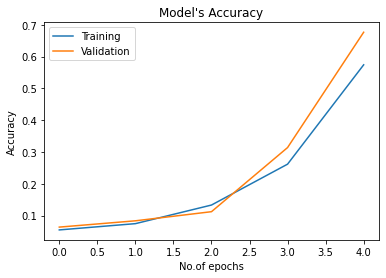

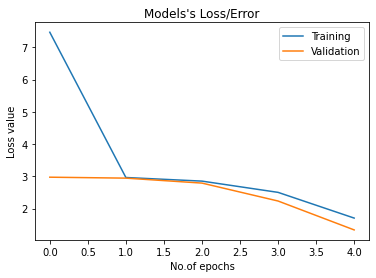

In [5]:
# Models Accuracy during training phase
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model's Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('No.of epochs')
plt.legend(['Training', 'Validation'])
plt.show()

# Models Loss/Error value during training phase
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Models's Loss/Error")
plt.ylabel("Loss value")
plt.xlabel("No.of epochs")
plt.legend(["Training", "Validation"])
plt.show()

In [17]:
# Predicting the Value for test sample
pred = model.predict_classes(X_test[[10],:])
print("The Model prediction for 10th sentence is: ",pred)
print("The correct Lable is: ",y_test[10])

The Model prediction for 10th sentence is:  [4]
The correct Lable is:  4


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
